# Import software libraries

In [1]:
# Import required libraries.
import sys                                                  # Read system parameters.
import numpy as np                                          # Work with multi-dimensional arrays.
import pandas as pd                                         # Manipulate and analyze data.
import matplotlib                                           # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns                                       # Make charting easier.
import sklearn                                              # Train and evaluate machine learning models.
from sklearn.model_selection import train_test_split, \
                                    learning_curve, \
                                    cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, \
                            confusion_matrix, \
                            classification_report, \
                            f1_score, \
                            recall_score, \
                            precision_score, \
                            roc_auc_score, \
                            plot_roc_curve, \
                            plot_precision_recall_curve, \
                            plot_confusion_matrix
from sklearn.dummy import DummyClassifier
import xgboost                                              # Build gradient boosting models.
from xgboost import XGBClassifier
import pickle                                               # Save Python objects as binary files.
from collections import Counter
import warnings                                             # Suppress warnings.
warnings.filterwarnings('ignore')

# Ensure results are reproducible.
np.random.seed(1)

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- NumPy {}'.format(np.__version__))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))
print('- scikit-learn {}'.format(sklearn.__version__))
print('- XGBoost {}'.format(xgboost.__version__))

Libraries used in this project:
- Python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
- NumPy 1.19.5
- pandas 1.3.4
- Matplotlib 3.4.3
- Seaborn 0.11.2
- scikit-learn 0.24.2
- XGBoost 1.5.1


# Read and examine the data

In [2]:
# Read the data.

df = pd.read_pickle("customer_data.pickle")

# Preview the first five rows of the data.

df.head()

,frequency,recency,tenure,monetary_value,number_unique_items,churned
u12747,6.0,367.0,369.0,39.19,3,True
u12748,41.0,365.0,369.0,12.01,9,False
u12749,2.0,127.0,130.0,22.28,2,True
u1282,0.0,0.0,326.0,0.00,1,False
u12822,0.0,0.0,87.0,0.00,1,True


In [3]:
# Check the structure of the data.

df.shape

(2130, 6)

In [4]:
#df.to_csv("data.csv", index=False)

# Prepare the data

In [5]:
# Define the target variable and get the count of each value in the variable.

df.describe()

,frequency,recency,tenure,monetary_value,number_unique_items
count,2130.000000,2130.000000,2130.000000,2130.000000,2130.000000
mean,1.662441,98.435681,214.496244,12.423202,2.151643
std,3.399520,119.996700,112.923328,16.514363,1.444775
min,0.000000,0.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,110.000000,0.000000,1.000000
50%,1.000000,25.000000,240.000000,4.250000,2.000000
75%,2.000000,195.000000,311.000000,20.800000,3.000000
max,78.000000,372.000000,373.000000,234.300000,9.000000


In [6]:
# Split the data into target and features.

X = df.iloc[:, 0:5]
y = df.iloc[:, 5]

In [7]:
# Split the dataset into separate training and testing sets.


X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

# Get the shape of both the training dataset and the test dataset.

X_train.shape, X_test.shape

((1704, 5), (426, 5))

In [8]:
# Use the Counter library to get the count of each value in the target variable (test data).

Counter(y_test)

Counter({True: 144, False: 282})

# Train a logistic regression model

In [9]:
# Normalize the training data.

minmax = MinMaxScaler()

In [10]:
X_train_scaled = minmax.fit_transform(X_train)

In [11]:
X_train_scaled

array([[0.        , 0.        , 0.10483871, 0.        , 0.14285714],
       [0.        , 0.        , 0.08333333, 0.        , 0.        ],
       [0.01282051, 0.12365591, 0.68548387, 0.01408451, 0.28571429],
       ...,
       [0.01282051, 0.09139785, 0.69354839, 0.08450704, 0.        ],
       [0.01282051, 0.19086022, 0.64516129, 0.00469484, 0.14285714],
       [0.        , 0.        , 0.01075269, 0.        , 0.        ]])

In [12]:
# Create a LogisticRegression() model and fit it on the scaled training data.

lr = LogisticRegression(random_state=0)

In [13]:
lr.fit(X_train_scaled,y_train)

LogisticRegression(random_state=0)

In [14]:
# Make predictions on the test data.

lr_pred = lr.predict(X_test)
lr_pred

# Get a count of each prediction value.

Counter(lr_pred)

Counter({True: 419, False: 7})

# Perform a quick evaluation of the logistic regression model

In [15]:
# Obtain the accuracy of the model's predictions.

accuracy_score(y_test,lr_pred)

0.3544600938967136

In [16]:
# Use the classification_report() function to get a table of additional metric scores.

print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

       False       1.00      0.02      0.05       282
        True       0.34      1.00      0.51       144

    accuracy                           0.35       426
   macro avg       0.67      0.51      0.28       426
weighted avg       0.78      0.35      0.20       426



# Train a random forest model

In [17]:
# Create a RandomForestClassifier() model and fit it on the scaled training data.

rf = RandomForestClassifier(random_state=0)

rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=0)

In [18]:
# Make predictions on the test data.

rf_pred = rf.predict(X_test)

# Get a count of each prediction value.

Counter(rf_pred)

Counter({False: 233, True: 193})

# Perform a quick evaluation of the random forest model

In [19]:
# Obtain the accuracy of the model's predictions.

accuracy_score(y_test, rf_pred)

0.5234741784037559

In [20]:
# Use the classification_report() function to get a table of additional metric scores.

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

       False       0.67      0.55      0.61       282
        True       0.35      0.47      0.40       144

    accuracy                           0.52       426
   macro avg       0.51      0.51      0.50       426
weighted avg       0.56      0.52      0.54       426



# Compare evaluation metrics for each model

In [21]:
# List will hold model objects.

models = []

# DummyClassifier() used as a baseline algorithm.

models.append(('Dummy Classifier', DummyClassifier(strategy = 'stratified')))

# Logistic Regression model.

models.append(('Logistic Regression', LogisticRegression()))

# Random Forest model.

models.append(('Random Forest', RandomForestClassifier()))

# XGBoost model.

models.append(('XGBoost', XGBClassifier(eval_metric = 'logloss', n_jobs = 1)))

In [22]:
# List will hold dictionaries of model scores.

scoring_df = []

# Train each model in the list and output multiple scores for each model.

for name, model in models:
    if name in ['Logistic Regression']:
        X_train_1 = X_train_scaled
    else:
        X_train_1 = X_train
    
    model.fit(X_train_1, y_train)
    
    y_pred = model.predict(X_test)

    # Calcualte the evaluation metrics for the model.
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    scoring_dict = {'Model': name,
                    'Accuracy': round(accuracy, 4), 
                    'F1 Score': round(f1, 4), 
                    'Precision' : round(precision, 4), 
                    'Recall' : round(recall, 4), 
                    'AUC' : round(auc ,4), 
                   }
    
    scoring_df.append(scoring_dict)

In [23]:
# Create a DataFrame from scoring_df.

finaldf= pd.DataFrame(scoring_df)
finaldf

# Sort the DataFrame by accuracy score (descending), then print it.

finaldf.sort_values(by="Accuracy", ascending=False)

,Model,Accuracy,F1 Score,Precision,Recall,AUC
0,Dummy Classifier,0.5962,0.4228,0.4091,0.4375,0.5574
3,XGBoost,0.5892,0.2291,0.3133,0.1806,0.4892
2,Random Forest,0.5775,0.2562,0.3163,0.2153,0.4888
1,Logistic Regression,0.3545,0.5115,0.3437,1.0000,0.5124


# Begin evaluating the best model

In [24]:
# Retrain the model with the highest accuracy score.

dummy = DummyClassifier(random_state=0, strategy='stratified')
dummy.fit(X_train_scaled, y_train)

DummyClassifier(random_state=0, strategy='stratified')

In [25]:
# Make predictions on the test data.

dummy_pred = dummy.predict(X_test)

# Get a count of each prediction value.

Counter(dummy_pred)

Counter({False: 281, True: 145})

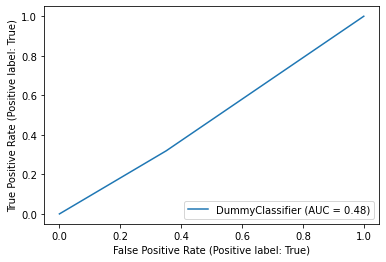

In [26]:
# Plot a ROC curve.

plot_roc_curve(dummy, X_test, y_test)

plt.show()


# Generate a confusion matrix of the best model

In [27]:
# Generate a confusion matrix.

cm = confusion_matrix(y_test,dummy_pred)
cm

array([[183,  99],
       [ 98,  46]], dtype=int64)

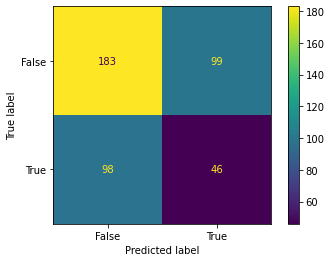

In [28]:
# Plot the confusion matrix.

plot_confusion_matrix(dummy, X_test, y_test)

plt.show()





# Generate a feature importance plot for the best model

In [29]:
X_train_df = pd.DataFrame(data=X_train, columns=['frequency','recency','tenure','monetary_value','number_unique_items'])
X_train_df

,frequency,recency,tenure,monetary_value,number_unique_items
0,0.0,0.0,40.0,0.00,2.0
1,0.0,0.0,32.0,0.00,1.0
2,1.0,46.0,256.0,3.30,3.0
3,2.0,229.0,338.0,13.20,3.0
4,1.0,48.0,71.0,16.50,1.0
...,...,...,...,...,...
1699,1.0,235.0,264.0,17.70,1.0
1700,2.0,150.0,171.0,25.95,5.0
1701,1.0,34.0,259.0,19.80,1.0
1702,1.0,71.0,241.0,1.10,2.0


In [30]:
# This function generates a feature importance plot on a bar chart.

def feature_importance_plot(model, X_train, n):
    """Plots feature importance. This only works for random forest and XGBoost models."""
    
    plt.figure(figsize=(8, 5))  # Set figure size.
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'barh')
    plt.title(f'Top {n} Features')
    plt.show()

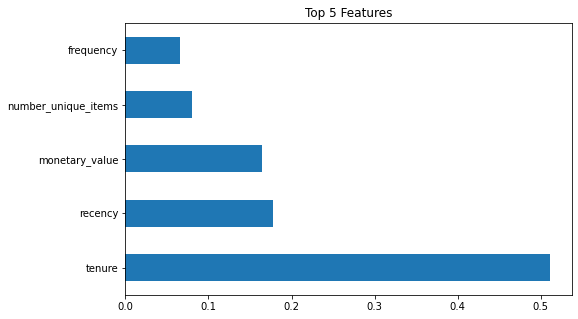

In [31]:
# Plot the feature importances.

feature_importance_plot(rf, X_train_df, 5)

# Plot a learning curve for the best model

In [32]:
# This function generates and plots a learning curve.

def plot_learning_curves(model, X_train, y_train):
    """Plots learning curves for model validation."""
    
    plt.figure(figsize=(5, 5))  # Set figure size.
    train_sizes, train_scores, test_scores = learning_curve(model,
                                                            X_train,
                                                            y_train,
                                                            cv = 5,  # Number of folds in cross-validation.
                                                            scoring = 'accuracy',  # Evaluation metric.
                                                            n_jobs = 1,
                                                            shuffle = True,
                                                            train_sizes = np.linspace(0.01, 1.0, 5))  # 5 different sizes of the training set.

    # Create means and standard deviations of training set scores.
    
    train_mean = np.mean(train_scores, axis = 1)
    train_std = np.std(train_scores, axis = 1)

    # Create means and standard deviations of test set scores.
    
    test_mean = np.mean(test_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)

    # Draw lines.
    
    plt.plot(train_sizes, train_mean, '--', color = '#111111', label = 'Training score')
    plt.plot(train_sizes, test_mean, color = '#111111', label = 'Cross-validation score')
    
    # Create plot.
    
    plt.title('Learning Curves')
    plt.xlabel('Training Set Size'), plt.ylabel('Accuracy'), plt.legend(loc = 'best')
    plt.tight_layout()
    
    plt.show()

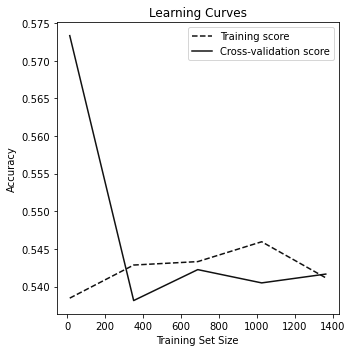

In [33]:
# Call the function to plot learning curves for the best model.

plot_learning_curves(dummy, X_train, y_train)

# Save the best model

In [34]:
# Save the best model as a pickle file named best_classification_model.pickle.

pickle.dump(dummy, open('best_classification_model.pickle','wb'))